<a id='top'></a>

# CSCI3022 S21
# Homework 7: Regression Practice
***

**Name**: Ara Anner

***

This assignment is due on Canvas by **MIDNIGHT on Friday, April 22**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Data Set 1](#p1) | [Data Set 2](#p2) | [Data Set 3](#p3) |  [Data Set 4](#p4) |
---

In [1]:
#old salwarts
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

#new friends
import seaborn as sns
import statsmodels.api as sm #this line is now always in our opener
from statsmodels.stats.outliers_influence import summary_table
from patsy import dmatrices # for making design matrices out of categorical features #instead of sm.add_constant


## [All problems: 11 points/ea]
**Shortcuts:**  [1](#p1) | [2](#p2) | [3](#p3) | [4](#p4) |


Run the cell below to load in the data set known as "Anscombe's Quartet."  It contains 4 data sets, each with its own set of $x$ and $y$ values.


Each data set has exactly 11 observations.  For each data set, you will perform the same steps of visualizing and fitting a linear model.

In [2]:
df = sns.load_dataset("anscombe")

print(df.head())
df['dataset'].unique()

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


array(['I', 'II', 'III', 'IV'], dtype=object)

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [25 points] Data Set 1

For the data set marked with "I" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

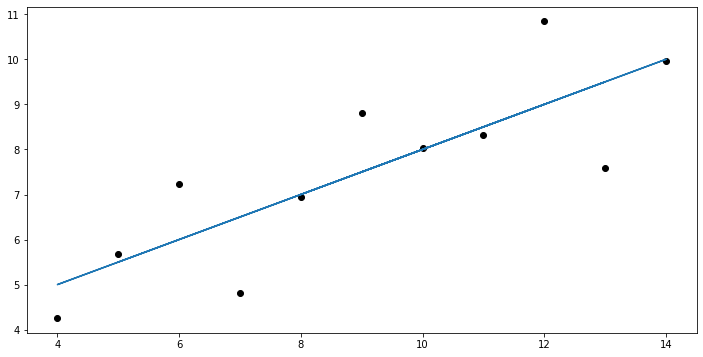

Slope: 0.5000909090909095
Intercept: 3.000090909090908


/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              257.9
Date:                Mon, 26 Apr 2021   Prob (F-statistic):                    1.81e-08
Time:                        00:15:34   Log-Likelihood:                         -20.044
No. Observations:                  11   AIC:                                      42.09
Df Residuals:                      10   BIC:                                      42.49
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7968      0.050     16.059      0.000       0.686       0.907
==============================================================================
Omnibus:                        1.171   Durbin-Watson:                   2.491
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.684
Skew:                          -0.572   Prob(JB):                        0.710
Kurtosis:                       2.573   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
x_i = []
y_i = []

# Get the values for x and y

for index, row in df.iterrows():
    if row["dataset"] == "I":
        x_i.append(row["x"])
        y_i.append(row["y"])
        
# Least-squares line of best fit (numpy has a function for this that I kinda like better).
    # The last arguement is the degree of the polynomial we're fitting. I chose 1 so it'll be a line.
m, b = np.polyfit(x_i, y_i, 1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6)) 
ax.scatter(x_i, y_i, c = 'black')

# Calculate LOBF stuff.

lobf_y = []

for x in x_i:
    lobf_y.append(x * m + b)

ax.plot(x_i, lobf_y)

plt.show()

print("Slope: " + str(m))
print("Intercept: " + str(b))

# Summary table:

(sm.OLS(y_i, x_i).fit()).summary()

$$y = 0.5x + 3$$


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


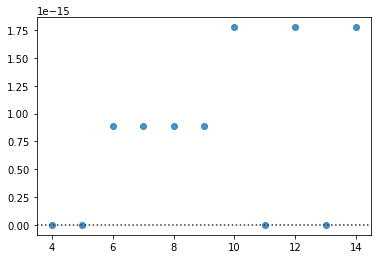

In [4]:
# Residual calculation...

sns.residplot(x_i, lobf_y)
plt.show()


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

$\textbf{Linearity:}$ I think a linear line is a fine fit for the original data; it roughly matches the dots and even goes through a few of the points.

$\textbf{Independence:}$ All points are independent.

$\textbf{Homoskedasticity:}$ The graph in part B appears to be homoskedastic (values don't "cone" out).

$\textbf{Normality:}$ It does not follow a normal distribution, based on the residual graph, as the values on the far right fluctuate between the maximum and the minimum (0).


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

[10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
[8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]


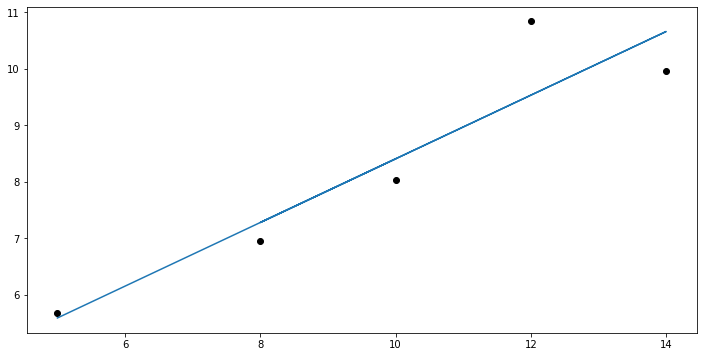

Slope: 0.5638114754098357
Intercept: 2.7686475409836078


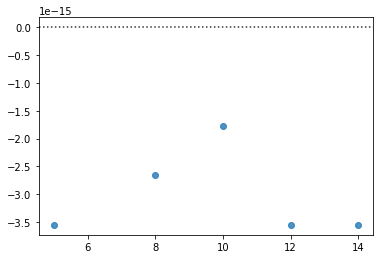

In [5]:
# Printing these to compare to the graph to understand what I need to remove.
print(x_i)
print(y_i)

# Remove all the values that didn't fit the line entirely (4, 6, 7, 9, 11, 13)

x_ammended = []
y_ammended = []

for i in range(0, len(x_i)):
    if x_i[i] != 4.0 and x_i[i] != 6.0 and x_i[i] != 7.0 and x_i[i] != 9.0 and x_i[i] != 11.0 and x_i[i] != 13.0:
        x_ammended.append(x_i[i])
        y_ammended.append(y_i[i])

# Repeated code from above (part A) ------------------------------------------------------------------------------------------------------------------------

m, b = np.polyfit(x_ammended, y_ammended, 1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6)) 
ax.scatter(x_ammended, y_ammended, c = 'black')

# Calculate LOBF stuff.

lobf_y = []

for x in x_ammended:
    lobf_y.append(x * m + b)

ax.plot(x_ammended, lobf_y)

plt.show()

print("Slope: " + str(m))
print("Intercept: " + str(b))

# Repeated code from above (part B) ------------------------------------------------------------------------------------------------------------------------

sns.residplot(x_ammended, lobf_y)
plt.show()


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

My thought process was that if the data followed a linear straight line, that its results would produce something more linear as a result using the line of best fit, so I made the data look more like the line of best fit by removing the ones that even strayed remotely from the line.

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [25 points] Data Set 2

For the data set marked with "II" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

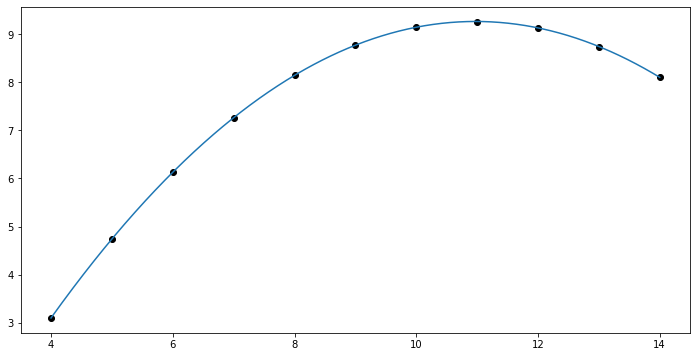

a: -0.12671328671328683
b: 2.7808391608391636
Intercept: -5.995734265734272


/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              257.7
Date:                Mon, 26 Apr 2021   Prob (F-statistic):                    1.82e-08
Time:                        00:15:35   Log-Likelihood:                         -20.049
No. Observations:                  11   AIC:                                      42.10
Df Residuals:                      10   BIC:                                      42.50
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7968      0.050     16.053      0.000       0.686       0.907
==============================================================================
Omnibus:                        4.616   Durbin-Watson:                   2.550
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                2.202
Skew:                          -1.093   Prob(JB):                        0.333
Kurtosis:                       3.153   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Assume everything from this point on is copy-pasted with minor adjustments. Thanks!

x_ii = []
y_ii = []

# Get the values for x and y

for index, row in df.iterrows():
    if row["dataset"] == "II":
        x_ii.append(row["x"])
        y_ii.append(row["y"])
        
# Least-squares line of best fit (numpy has a function for this that I kinda like better).
    # The last arguement is the degree of the polynomial we're fitting. This time, it's 2!
a, b, c = np.polyfit(x_ii, y_ii, 2)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6)) 
ax.scatter(x_ii, y_ii, c = 'black')

# Calculate LOBF stuff.

lobf_x = np.linspace(min(x_ii), max(x_ii), 1000) # Done because I wanted the parabola to look like a parabola

lobf_y = []

for x in lobf_x:
    lobf_y.append(a * pow(x, 2) + b * x + c) # Function stuff. a * x^2 + b * x + c

ax.plot(lobf_x, lobf_y)

plt.show()

print("a: " + str(a))
print("b: " + str(b))
print("Intercept: " + str(c))

# Summary table:

(sm.OLS(y_ii, x_ii).fit()).summary()

$$y = -0.12671328671328683x^{2} + 2.7808391608391636x - 5.995734265734272$$


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


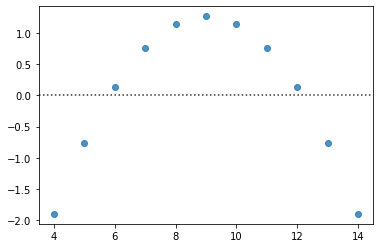

In [7]:
# Make a lobf_y for not-graphing

lobf_y_res = []

for x in x_ii:
    lobf_y_res.append(a * pow(x, 2) + b * x + c)

sns.residplot(x_ii, lobf_y_res)
plt.show()


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

$\textbf{Linearity:}$ For this data, I chose a parabola, which seems to perfectly mimic the data. So, a straight line is not really appropriate.

$\textbf{Independence:}$ All points are independent (no repeated values).

$\textbf{Homoskedasticity:}$ The graph in part B appears to be homoskedastic (values don't "cone" out).

$\textbf{Normality:}$ It follows a normal distribution in the part B graph.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

In [8]:
# Nope, I think we're good here!


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

I think the model works just fine, as the parabola appears to pass through precisely the right points and tightly fits the data.

$\textbf{Quick note:}$, I realize as I'm writing this now that I sort of jumped the shark by using a parabola immediately to represent the data (I usually ran the scatterplot graph first to make sure it was working/I was representing the correct data, so I could tell immediately that it was a parabola).

In short, $\textbf{the original should've been a straight line that would've violated some of the assumptions}$ (linearity for example, as a straight line is clearly NOT the best way to represent this data), and thus the fix would be making the LoBF a parabola. Sorry!

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
## [25 points] Data Set 3

For the data set marked with "III" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

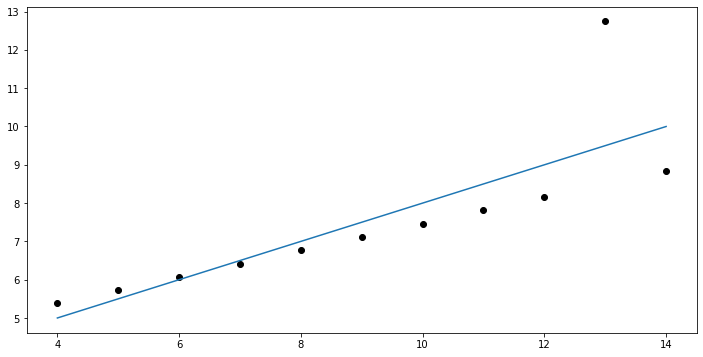

m: 0.49972727272727313
b: 3.0024545454545444


/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              257.7
Date:                Mon, 26 Apr 2021   Prob (F-statistic):                    1.82e-08
Time:                        00:15:36   Log-Likelihood:                         -20.047
No. Observations:                  11   AIC:                                      42.09
Df Residuals:                      10   BIC:                                      42.49
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7967      0.050     16.053      0.000       0.686       0.907
==============================================================================
Omnibus:                        0.727   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.614
Skew:                          -0.215   Prob(JB):                        0.735
Kurtosis:                       1.925   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Assume everything from this point on is copy-pasted with minor adjustments. Thanks!

x_iii = []
y_iii = []

# Get the values for x and y

for index, row in df.iterrows():
    if row["dataset"] == "III":
        x_iii.append(row["x"])
        y_iii.append(row["y"])
        
# Least-squares line of best fit (numpy has a function for this that I kinda like better).
    # The last arguement is the degree of the polynomial we're fitting. We're going back to 1.
m, b = np.polyfit(x_iii, y_iii, 1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6)) 
ax.scatter(x_iii, y_iii, c = 'black')

# Calculate LOBF stuff.

lobf_x = np.linspace(min(x_iii), max(x_iii), 1000) #Kept because I like the detailed line.

lobf_y = []

for x in lobf_x:
    lobf_y.append(m * x + b) # Function stuff. a * x^2 + b * x + c

ax.plot(lobf_x, lobf_y)

plt.show()

print("m: " + str(m))
print("b: " + str(b))

# Summary table:

(sm.OLS(y_iii, x_iii).fit()).summary()


$$y = 0.49972727272727313x + 3.0024545454545444$$


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


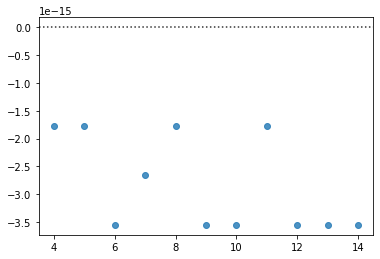

In [10]:
# Make a lobf_y for not-graphing

lobf_y_res = []

for x in x_iii:
    lobf_y_res.append(m * x + b)

sns.residplot(x_iii, lobf_y_res)
plt.show()


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

$\textbf{Linearity:}$ The data is somewhat well represented by a straight line, although the outlier makes it hard to say that for certainty.

$\textbf{Independence:}$ All points are independent (no repeated values).

$\textbf{Homoskedasticity:}$ The graph in part B appears to be homoskedastic (values don't "cone" out).

$\textbf{Normality:}$ The graph does not follow a normal distribution. This one is violated.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

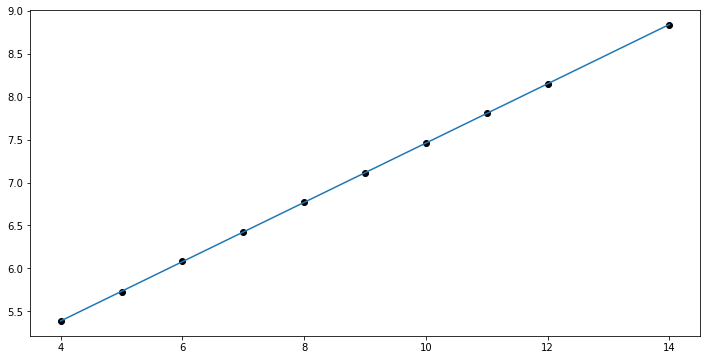

m: 0.34538961038961036
b: 4.0056493506493505


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


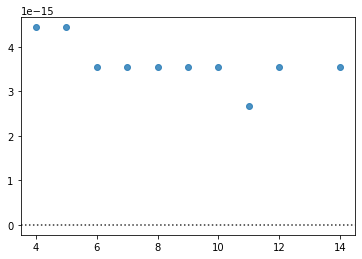

/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              257.7
Date:                Mon, 26 Apr 2021   Prob (F-statistic):                    1.82e-08
Time:                        00:15:36   Log-Likelihood:                         -20.047
No. Observations:                  11   AIC:                                      42.09
Df Residuals:                      10   BIC:                                      42.49
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7967      0.050     16.053      0.000       0.686       0.907
==============================================================================
Omnibus:                        0.727   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.614
Skew:                          -0.215   Prob(JB):                        0.735
Kurtosis:                       1.925   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Remove that outlier

new_x_iii = []
new_y_iii = []

for i in range(0, len(x_iii)):
    if x_iii[i] <= 12 or x_iii[i] >= 14:
        new_x_iii.append(x_iii[i])
        new_y_iii.append(y_iii[i])

# PART A STUFF HERE ----------------------------------------------------------------------------------------------------------------------------

m, b = np.polyfit(new_x_iii, new_y_iii, 1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6)) 
ax.scatter(new_x_iii, new_y_iii, c = 'black')

# Calculate LOBF stuff.

lobf_x = np.linspace(min(new_x_iii), max(new_x_iii), 1000) #Kept because I like the detailed line.

lobf_y = []

for x in lobf_x:
    lobf_y.append(m * x + b)

ax.plot(lobf_x, lobf_y)

plt.show()

print("m: " + str(m))
print("b: " + str(b))

# PART B GO HERE--------------------------------------------------------------------------------------------------------------------------------

lobf_y_res = []

for x in new_x_iii:
    lobf_y_res.append(m * x + b)

sns.residplot(new_x_iii, lobf_y_res)
plt.show()

# Summary table:

(sm.OLS(y_iii, x_iii).fit()).summary()


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

The outlier unbalanced a lot of things, so I opted to remove it so the line better fit the data. The effects are that all the points fit perfectly on the LoBF, and the data is complient with the rules of linearity.

<br>

---
<a/ id='p4'></a>
[Back to top](#top)
## [25 points] Data Set 4

For the data set marked with "IV" in the given data frame, perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

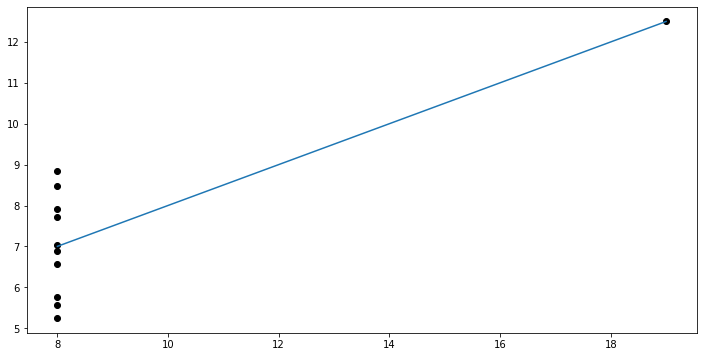

m: 0.49990909090909086
b: 3.0017272727272735


/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              258.0
Date:                Mon, 26 Apr 2021   Prob (F-statistic):                    1.81e-08
Time:                        00:15:37   Log-Likelihood:                         -20.043
No. Observations:                  11   AIC:                                      42.09
Df Residuals:                      10   BIC:                                      42.48
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7968      0.050     16.062      0.000       0.686       0.907
==============================================================================
Omnibus:                        0.522   Durbin-Watson:                   0.947
Prob(Omnibus):                  0.770   Jarque-Bera (JB):                0.468
Skew:                          -0.395   Prob(JB):                        0.791
Kurtosis:                       2.370   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Assume everything from this point on is copy-pasted with minor adjustments. Thanks!

x_iv = []
y_iv = []

# Get the values for x and y

for index, row in df.iterrows():
    if row["dataset"] == "IV":
        x_iv.append(row["x"])
        y_iv.append(row["y"])
        
# Least-squares line of best fit (numpy has a function for this that I kinda like better).
    # The last arguement is the degree of the polynomial we're fitting. This time, it's 2!
m, b = np.polyfit(x_iv, y_iv, 1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6)) 
ax.scatter(x_iv, y_iv, c = 'black')

# Calculate LOBF stuff.

lobf_x = np.linspace(min(x_iv), max(x_iv), 1000)

lobf_y = []

for x in lobf_x:
    lobf_y.append(m * x + b)

ax.plot(lobf_x, lobf_y)

plt.show()

print("m: " + str(m))
print("b: " + str(b))
# Summary table:

(sm.OLS(y_iv, x_iv).fit()).summary()

# Have you ever looked at a graph and went: man this is evil.

$$y = 0.49990909090909086x + 3.0017272727272735$$


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


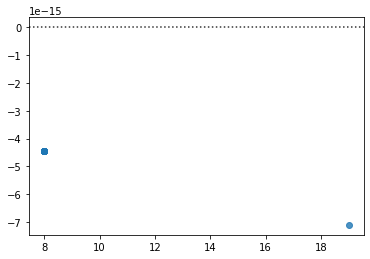

In [13]:
# Make a lobf_y for not-graphing

lobf_y_res = []

for x in x_iv:
    lobf_y_res.append(m * x + b)

sns.residplot(x_iv, lobf_y_res)
plt.show()


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

$\textbf{Linearity:}$ The data is not at all well-represented by a line. This rule is violated.

$\textbf{Independence:}$ There are repeated values, so this is violated.

$\textbf{Homoskedasticity:}$ There are only two values, so this is difficult to say. I'll go with violated.

$\textbf{Normality:}$ The graph does not follow a normal distribution. This one is violated.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

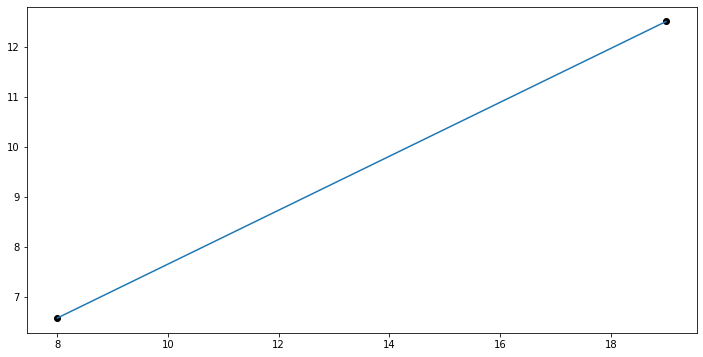

m: 0.5381818181818181
b: 2.2745454545454584


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


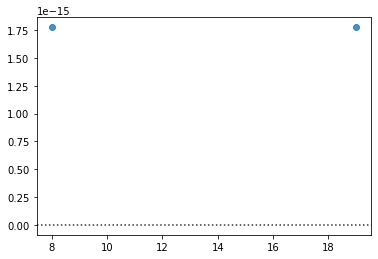

/opt/conda/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              134.5
Date:                Mon, 26 Apr 2021   Prob (F-statistic):                      0.0548
Time:                        00:15:37   Log-Likelihood:                         -2.5320
No. Observations:                   2   AIC:                                      7.064
Df Residuals:                       1   BIC:                                      5.757
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6827      0.059     11.596      0.055      -0.065       1.431
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.715
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.333
Skew:                           0.000   Prob(JB):                        0.846
Kurtosis:                       1.000   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# WE CAN PRETTY MUCH JUST DASH EVERY POINT ON X = 8 SAVE FOR ONE, CAN'T WE?

x_iv_new = []
y_iv_new = []

keep_one_8 = True # We keep one x = 8 value and that is it.

# Unnecessarily-complex forloop to ensure we don't get multiple x=8 values.

for i in range(0, len(x_iv)):
    if x_iv[i] == 8:
        if keep_one_8 == True:
            x_iv_new.append(x_iv[i])
            y_iv_new.append(y_iv[i])
            keep_one_8 = False
    else:
        x_iv_new.append(x_iv[i])
        y_iv_new.append(y_iv[i])

# PART A STUFF AGAIN ---------------------------------------------------------------------------------------------------------------------------

m, b = np.polyfit(x_iv_new, y_iv_new, 1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6)) 
ax.scatter(x_iv_new, y_iv_new, c = 'black')

# Calculate LOBF stuff.

lobf_x = np.linspace(min(x_iv_new), max(x_iv_new), 1000)

lobf_y = []

for x in lobf_x:
    lobf_y.append(m * x + b)

ax.plot(lobf_x, lobf_y)

plt.show()

print("m: " + str(m))
print("b: " + str(b))

# PART B STUFF ---------------------------------------------------------------------------------------------------------------------------------

# Make a lobf_y for not-graphing

lobf_y_res = []

for x in x_iv_new:
    lobf_y_res.append(m * x + b)

sns.residplot(x_iv_new, lobf_y_res)
plt.show()


# Summary table:

(sm.OLS(y_iv_new, x_iv_new).fit()).summary()


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

With the data given, there was really no way to make a linear LoBF, so I removed any repeated data on the same point at $x = 8$ so that it would be possible in the first place to actually make a LoBF. As a result, we have a lot less data, so I can't really say that this is the best way to represent the data.